
## Data Analytics in Health Care and Connected Care/Health Information Systems
 *Practical Session II: Data Analytics in Healthcare and Connected Care/Health  Information Systems - working with data from a real healthcare database*

---
---
The aims of this practical session are: (a) to make you work with (a subset of) data from a real healthcare database, MIMIC-III (Medical Information Mart for Intensive Care III); (b) explore the data available using simple and complex SQL queries; (c) analyse more in details patient's data. One of the group members must submit the completed notebook of the second practical session in Canvas by March 20th, 23:59:59 (GMT+1).

---


---

*Lecturer/s: Bart Jansen (bjansen@etrovub.be),  Jef Vandemeulebroucke (jefvdmb@etrovub.be), Nikolaos Deligiannis (ndeligia@etrovub.be)*

*Teaching assistant/s: Joris Wuts(jwuts@etrovub.be), Jasabanta Patro (jpatro@etrovub.be), Redona Brahimetaj (rbrahime@etrovub.be)*




In [41]:
student1_full_name = str(input('Enter your full name: '))
student1_id = int(input('Enter your student ID: '))
student2_full_name = str(input('Enter your full name: '))
student2_id = int(input('Enter your student ID: '))

---
---
#Getting started with SQLite in Python
---

---


> Accessing data from a database like Structured Query Language (SQL) is not only efficient, but it allows you also to subset and import only the parts of the data that you need. During this practical session, you will use [SQLite](https://sqlite.org/docs.html) (a C-language library that implements a small, fast, self-contained SQL database engine) and the 'mimicdata.sqlite' file shared in Canvas. 

---
---

In [42]:
#import libraries 
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, matplotlib.pyplot as plt,sqlite3


In this first part of the lab session, you should: 

*   connect to the MIMIC database using sqlite3 library.
*   list all the table names present in the database.
*   read [here](https://mimic.physionet.org/mimictables/) the description about the MIMIC-III tables present in the 'sqlite' file you will be using.
*   choose two tables of your choice and find out for each of them, their corresponding column names and the number of records present.
*   read these two tables into a dataframe.

Keywords: [sqlite 3 connection](https://docs.python.org/3/library/sqlite3.html#connection-objects), [MIMIC tables](https://mimic.physionet.org/mimictables/) ,[query execution](https://docs.python.org/3/library/sqlite3.html#sqlite3.Cursor.execute), [read sql query into a DataFrame.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_sql_query.html)


In [43]:
#connect to the MIMIC database using sqlite3 library.
db = sqlite3.connect('mimicdata.sqlite', uri=True)
cursor = db.cursor()

In [44]:
#list all the table names present in the database.
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('CHARTEVENTS',), ('DIAGNOSES_ICD',), ('D_ICD_DIAGNOSES',), ('D_ITEMS',), ('D_LABITEMS',), ('ICUSTAYS',), ('INPUTEVENTS_MV',), ('LABEVENTS',), ('OUTPUTEVENTS',), ('PRESCRIPTIONS',), ('PROCEDUREEVENTS_MV',), ('TRANSFERS',), ('ADMISSIONS',), ('MICROBIOLOGYEVENTS',), ('PATIENTS',)]


In [45]:
#choose two tables of your choice and find out for each of them, their corresponding column names and the number of records present.
cursor.execute("SELECT * FROM PATIENTS")
column_name= [tuple[0] for tuple in cursor.description]
print(column_name)
count = cursor.execute("SELECT COUNT(*) FROM PATIENTS")
print(cursor.fetchall()[0][0])

['ROW_ID', 'SUBJECT_ID', 'GENDER', 'DOB', 'DOD', 'DOD_HOSP', 'DOD_SSN', 'EXPIRE_FLAG']
8


In [46]:
cursor.execute("SELECT * FROM ICUSTAYS")
column_name= [tuple[0] for tuple in cursor.description]
print(column_name)
count = cursor.execute("SELECT COUNT(*) FROM ICUSTAYS")
print(cursor.fetchall()[0][0])

['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'DBSOURCE', 'FIRST_CAREUNIT', 'LAST_CAREUNIT', 'FIRST_WARDID', 'LAST_WARDID', 'INTIME', 'OUTTIME', 'LOS']
11


In [47]:
#read these two tables into a dataframe.
table1_query = ("SELECT * FROM PATIENTS ")
df1 = pd.read_sql(table1_query,con=db)
df1.head()


,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,30802,40004,M,2118-09-11 00:00:00,2172-11-12 00:00:00,,2172-11-12 00:00:00,1
1,30810,40036,M,2075-04-25 00:00:00,2143-09-03 00:00:00,2143-09-03 00:00:00,2143-09-03 00:00:00,1
2,30821,40080,F,2027-08-04 00:00:00,2106-06-14 00:00:00,,2106-06-14 00:00:00,1
3,30823,40084,M,2149-10-04 00:00:00,2173-02-05 00:00:00,2173-02-05 00:00:00,2173-02-05 00:00:00,1
4,30828,40116,M,2109-03-21 00:00:00,2150-09-26 00:00:00,,2150-09-26 00:00:00,1


In [48]:
table2_query = ("SELECT * FROM ICUSTAYS ")
df2 = pd.read_sql(table2_query,con=db)
df2.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS
0,41339,40004,121157,256307,metavision,MICU,MICU,50,50,2171-03-01 17:51:30,2171-03-05 18:28:23,4.0256
1,41347,40036,198489,285485,metavision,MSICU,MSICU,52,52,2141-08-01 23:48:48,2141-08-02 18:41:50,0.7868
2,41363,40080,162107,252522,metavision,MICU,MICU,23,23,2106-05-31 16:43:46,2106-06-05 13:18:50,4.8577
3,41365,40084,195762,264630,metavision,TSICU,TSICU,14,14,2173-01-31 22:11:54,2173-02-05 04:13:20,4.2510
4,41373,40116,157106,232646,metavision,MICU,MICU,23,23,2150-02-19 00:14:33,2150-02-25 17:03:04,6.7004


---
# Explore the data using SQL queries
---
---
The main goal of this part of the lab session is to familiarize yourself with simple and complex sql queries that you can write in order to retrieve only a part of the data you have interest to perform analysis. We suggest that you save your queries into variables to avoid having to re-think/re-write them each time you want to use again. Towards reaching the main goal mentioned, you need to: 

---
### Write sql queries to query single tables:
---
*   Display only the 'microbiologyevents' information for which a blood culture was performed.
*   Display the number of urine specimen tested for bacterial growth. 
*   Display all the distinct drug values (from prescription table) used among all the records present.
*   Considering the information available at 'ransfers' table, find out the numbers of patients admitted; transfered or discharged from the hospital.
*   Display only the records from outputevents table for substances whose level of injection was higher than 100 mL (ordered based on the injection value) and caregiver id was 21452 and 21108. 
---
### Write sql queries to query multiple tables:
---
*   Join 'admissions' and 'patient' table. 
*   Join 'admissions', 'patient' and 'icustays' table (pay attention to the keys).
*   Get the length of stay for all patients (measured in fractional days) and plot their distribution for male and female patients.
*   Write a query that selects SUBJECT_ID, GENDER, ICUSTAY_ID and adds a column 'LOS_nominal' that converts the 'LOS' into a nominal variable ('Short' if los value <= 3 else 'Long').
---


Keywords: [sqlite](https://docs.python.org/3/library/sqlite3.html#module-functions-and-constants), [sqlite select](https://www.sqlitetutorial.net/sqlite-select/), [sqlite where](https://www.sqlitetutorial.net/sqlite-where/), [sqlite select distinct](https://www.sqlitetutorial.net/sqlite-select-distinct), [sqlite order by](https://www.sqlitetutorial.net/sqlite-order-by/), [sqlite IN operator](https://www.sqlitetutorial.net/sqlite-in/), [sqlite group by](https://www.sqlitetutorial.net/sqlite-group-by/), [sqlite join](https://www.sqlitetutorial.net/sqlite-join/).


In [49]:
#display only the microbiology_events information for which a blood culture was performed.
df_micro = pd.read_sql_query(" SELECT * FROM MICROBIOLOGYEVENTS",con=db)
blood_culture = df_micro[df_micro['SPEC_TYPE_DESC'] == 'BLOOD CULTURE']
blood_culture

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,SPEC_ITEMID,SPEC_TYPE_DESC,ORG_ITEMID,ORG_NAME,ISOLATE_NUM,AB_ITEMID,AB_NAME,DILUTION_TEXT,DILUTION_COMPARISON,DILUTION_VALUE,INTERPRETATION
13,268050,40161,180396,2181-10-24 00:00:00,2181-10-24 18:10:00,70012,BLOOD CULTURE,80238,CLOSTRIDIUM SPECIES NOT C. PERFRINGENS OR C. S...,1,NaN,,,,NaN,
16,268847,40161,180396,2181-11-23 00:00:00,2181-11-23 23:47:00,70012,BLOOD CULTURE,80005,KLEBSIELLA OXYTOCA,1,90012.0,GENTAMICIN,<=1,<=,1.0,S
17,268848,40161,180396,2181-11-23 00:00:00,2181-11-23 23:47:00,70012,BLOOD CULTURE,80005,KLEBSIELLA OXYTOCA,1,90013.0,TOBRAMYCIN,<=1,<=,1.0,S
18,268849,40161,180396,2181-11-23 00:00:00,2181-11-23 23:47:00,70012,BLOOD CULTURE,80005,KLEBSIELLA OXYTOCA,1,90017.0,CEFTAZIDIME,<=1,<=,1.0,S
19,268850,40161,180396,2181-11-23 00:00:00,2181-11-23 23:47:00,70012,BLOOD CULTURE,80005,KLEBSIELLA OXYTOCA,1,90018.0,CEFTRIAXONE,<=1,<=,1.0,S
20,268851,40161,180396,2181-11-23 00:00:00,2181-11-23 23:47:00,70012,BLOOD CULTURE,80005,KLEBSIELLA OXYTOCA,1,90019.0,CIPROFLOXACIN,<=0.25,<=,0.0,S
21,268852,40161,180396,2181-11-23 00:00:00,2181-11-23 23:47:00,70012,BLOOD CULTURE,80005,KLEBSIELLA OXYTOCA,1,90022.0,AMPICILLIN/SULBACTAM,=>32,=>,32.0,R
22,268853,40161,180396,2181-11-23 00:00:00,2181-11-23 23:47:00,70012,BLOOD CULTURE,80005,KLEBSIELLA OXYTOCA,1,90026.0,PIPERACILLIN/TAZO,=>128,=>,128.0,R
23,268854,40161,180396,2181-11-23 00:00:00,2181-11-23 23:47:00,70012,BLOOD CULTURE,80005,KLEBSIELLA OXYTOCA,1,90028.0,CEFEPIME,<=1,<=,1.0,S
24,268855,40161,180396,2181-11-23 00:00:00,2181-11-23 23:47:00,70012,BLOOD CULTURE,80005,KLEBSIELLA OXYTOCA,1,90005.0,CEFAZOLIN,=>64,=>,64.0,R


In [50]:
#display the number of urine specimen tested for bacterial growth.
urine_culture = df_micro[df_micro['SPEC_TYPE_DESC'] == 'URINE']
urine_culture

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,SPEC_ITEMID,SPEC_TYPE_DESC,ORG_ITEMID,ORG_NAME,ISOLATE_NUM,AB_ITEMID,AB_NAME,DILUTION_TEXT,DILUTION_COMPARISON,DILUTION_VALUE,INTERPRETATION
1,268038,40161,180396,2181-10-24 00:00:00,2181-10-24 18:26:00,70079,URINE,80002,ESCHERICHIA COLI,1,90012.0,GENTAMICIN,<=1,<=,1.0,S
2,268039,40161,180396,2181-10-24 00:00:00,2181-10-24 18:26:00,70079,URINE,80002,ESCHERICHIA COLI,1,90029.0,MEROPENEM,<=0.25,<=,0.0,S
3,268040,40161,180396,2181-10-24 00:00:00,2181-10-24 18:26:00,70079,URINE,80002,ESCHERICHIA COLI,1,90028.0,CEFEPIME,<=1,<=,1.0,S
4,268041,40161,180396,2181-10-24 00:00:00,2181-10-24 18:26:00,70079,URINE,80002,ESCHERICHIA COLI,1,90022.0,AMPICILLIN/SULBACTAM,4,=,4.0,S
5,268042,40161,180396,2181-10-24 00:00:00,2181-10-24 18:26:00,70079,URINE,80002,ESCHERICHIA COLI,1,90019.0,CIPROFLOXACIN,<=0.25,<=,0.0,S
6,268043,40161,180396,2181-10-24 00:00:00,2181-10-24 18:26:00,70079,URINE,80002,ESCHERICHIA COLI,1,90018.0,CEFTRIAXONE,<=1,<=,1.0,S
7,268044,40161,180396,2181-10-24 00:00:00,2181-10-24 18:26:00,70079,URINE,80002,ESCHERICHIA COLI,1,90013.0,TOBRAMYCIN,<=1,<=,1.0,S
8,268045,40161,180396,2181-10-24 00:00:00,2181-10-24 18:26:00,70079,URINE,80002,ESCHERICHIA COLI,1,90010.0,NITROFURANTOIN,32,=,32.0,S
9,268046,40161,180396,2181-10-24 00:00:00,2181-10-24 18:26:00,70079,URINE,80002,ESCHERICHIA COLI,1,90008.0,TRIMETHOPRIM/SULFA,<=1,<=,1.0,S
10,268047,40161,180396,2181-10-24 00:00:00,2181-10-24 18:26:00,70079,URINE,80002,ESCHERICHIA COLI,1,90005.0,CEFAZOLIN,<=4,<=,4.0,S


In [51]:
#display all the distinct drug values (from prescription table) used among all the records present.
drugs=pd.read_sql(" SELECT DISTINCT DRUG_NAME_GENERIC FROM PRESCRIPTIONS",con=db)
drugs

,DRUG_NAME_GENERIC
0,FoLIC Acid
1,Multivitamins
2,Carvedilol
3,Cyanocobalamin
4,Lisinopril
...,...
128,Milk Of Magnesia
129,Artificial Tear Ointment
130,Artificial Tears Preserv. Free
131,Heparin


In [52]:
#considering the information available at transfers table, find out the numbers of patients admitted; transfered or discharged from the hospital.
df_transfers = pd.read_sql_query("SELECT EVENTTYPE,count(*) FROM TRANSFERS GROUP BY EVENTTYPE",con=db)
df_transfers.head()

,EVENTTYPE,count(*)
0,admit,10
1,discharge,10
2,transfer,20


In [53]:
total_rows = pd.read_sql("SELECT * FROM TRANSFERS",con=db).shape[0]
print(f"total number of patients: {total_rows}")

total number of patients: 40


In [54]:
#display only information for substances whose level of injection was higher than 100 mL (ordered based on the injection value) and caregiver id was 21452 and 21108. 
injection=pd.read_sql("SELECT * FROM OUTPUTEVENTS WHERE VALUE>100 AND CGID IN (21452,21108)",con=db)
injection

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,CHARTTIME,ITEMID,VALUE,VALUEUOM,STORETIME,CGID,STOPPED,NEWBOTTLE,ISERROR
0,2971268,40124,126179,279554,2130-02-04 20:00:00,226559,320.0,mL,2130-02-04 20:12:00,21452,,,None
1,2971269,40124,126179,279554,2130-02-04 21:21:00,226559,280.0,mL,2130-02-04 21:21:00,21452,,,None
2,2971270,40124,126179,279554,2130-02-04 22:00:00,226559,200.0,mL,2130-02-04 22:59:00,21452,,,None
3,2971271,40124,126179,279554,2130-02-04 23:00:00,226559,200.0,mL,2130-02-04 22:59:00,21452,,,None
4,2971272,40124,126179,279554,2130-02-05 00:00:00,226559,250.0,mL,2130-02-05 01:11:00,21452,,,None
5,2971273,40124,126179,279554,2130-02-05 01:00:00,226559,250.0,mL,2130-02-05 01:11:00,21452,,,None
6,2971274,40124,126179,279554,2130-02-05 02:00:00,226559,200.0,mL,2130-02-05 04:22:00,21452,,,None
7,2971275,40124,126179,279554,2130-02-05 03:00:00,226559,150.0,mL,2130-02-05 04:22:00,21452,,,None
8,2971317,40124,126179,279554,2130-02-05 05:00:00,226559,160.0,mL,2130-02-05 06:28:00,21452,,,None
9,2971318,40124,126179,279554,2130-02-05 06:00:00,226559,160.0,mL,2130-02-05 06:28:00,21452,,,None


In [55]:
#join admissions and patient table
admission_patient = pd.read_sql_query("SELECT * FROM ADMISSIONS INNER JOIN PATIENTS ON ADMISSIONS.SUBJECT_ID=PATIENTS.SUBJECT_ID;",con=db)
admission_patient


,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,HAS_IOEVENTS_DATA,HAS_CHARTEVENTS_DATA,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,39793,40036,198489,2141-08-01 23:46:00,2141-08-09 19:15:00,,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Medicare,...,1,1,30810,40036,M,2075-04-25 00:00:00,2143-09-03 00:00:00,2143-09-03 00:00:00,2143-09-03 00:00:00,1
1,39807,40080,162107,2106-05-31 16:43:00,2106-06-05 01:18:00,,EMERGENCY,CLINIC REFERRAL/PREMATURE,SNF,Medicaid,...,1,1,30821,40080,F,2027-08-04 00:00:00,2106-06-14 00:00:00,,2106-06-14 00:00:00,1
2,39809,40084,195762,2173-01-31 22:11:00,2173-02-05 01:31:00,2173-02-05 01:31:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Private,...,1,1,30823,40084,M,2149-10-04 00:00:00,2173-02-05 00:00:00,2173-02-05 00:00:00,2173-02-05 00:00:00,1
3,39817,40116,157106,2150-02-19 00:12:00,2150-03-11 13:58:00,,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,SHORT TERM HOSPITAL,Medicaid,...,1,1,30828,40116,M,2109-03-21 00:00:00,2150-09-26 00:00:00,,2150-09-26 00:00:00,1
4,39818,40120,146466,2120-01-27 20:41:00,2120-02-12 17:14:00,,EMERGENCY,EMERGENCY ROOM ADMIT,LONG TERM CARE HOSPITAL,Medicare,...,1,1,30829,40120,M,2045-04-24 00:00:00,2120-02-24 00:00:00,2120-02-24 00:00:00,,1
5,39819,40120,158997,2120-02-21 15:22:00,2120-02-24 07:30:00,2120-02-24 07:30:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,...,1,1,30829,40120,M,2045-04-24 00:00:00,2120-02-24 00:00:00,2120-02-24 00:00:00,,1
6,39821,40124,126179,2130-02-04 02:26:00,2130-02-10 17:39:00,,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,...,1,1,30831,40124,F,2063-07-05 00:00:00,2130-11-03 00:00:00,2130-11-03 00:00:00,2130-11-03 00:00:00,1
7,39822,40124,146893,2130-08-12 05:49:00,2130-08-18 15:30:00,,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,...,1,1,30831,40124,F,2063-07-05 00:00:00,2130-11-03 00:00:00,2130-11-03 00:00:00,2130-11-03 00:00:00,1
8,39828,40161,180396,2181-10-24 15:58:00,2181-11-26 17:15:00,2181-11-26 17:15:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,...,1,1,30837,40161,M,2097-12-11 00:00:00,2181-11-26 00:00:00,2181-11-26 00:00:00,2181-11-26 00:00:00,1
9,39785,40004,121157,2171-03-01 17:51:00,2171-03-08 14:26:00,,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Medicare,...,1,1,30802,40004,M,2118-09-11 00:00:00,2172-11-12 00:00:00,,2172-11-12 00:00:00,1


In [56]:
#join admission, patient and icustays
join = pd.read_sql("SELECT * FROM ADMISSIONS INNER  JOIN PATIENTS,ICUSTAYS",con=db)
join

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS
0,39793,40036,198489,2141-08-01 23:46:00,2141-08-09 19:15:00,,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Medicare,...,121157,256307,metavision,MICU,MICU,50,50,2171-03-01 17:51:30,2171-03-05 18:28:23,4.0256
1,39793,40036,198489,2141-08-01 23:46:00,2141-08-09 19:15:00,,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Medicare,...,198489,285485,metavision,MSICU,MSICU,52,52,2141-08-01 23:48:48,2141-08-02 18:41:50,0.7868
2,39793,40036,198489,2141-08-01 23:46:00,2141-08-09 19:15:00,,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Medicare,...,162107,252522,metavision,MICU,MICU,23,23,2106-05-31 16:43:46,2106-06-05 13:18:50,4.8577
3,39793,40036,198489,2141-08-01 23:46:00,2141-08-09 19:15:00,,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Medicare,...,195762,264630,metavision,TSICU,TSICU,14,14,2173-01-31 22:11:54,2173-02-05 04:13:20,4.2510
4,39793,40036,198489,2141-08-01 23:46:00,2141-08-09 19:15:00,,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Medicare,...,157106,232646,metavision,MICU,MICU,23,23,2150-02-19 00:14:33,2150-02-25 17:03:04,6.7004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,39785,40004,121157,2171-03-01 17:51:00,2171-03-08 14:26:00,,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Medicare,...,158997,245649,metavision,CCU,CCU,7,7,2120-02-21 15:23:32,2120-02-24 11:38:17,2.8436
876,39785,40004,121157,2171-03-01 17:51:00,2171-03-08 14:26:00,,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Medicare,...,126179,279554,metavision,MICU,MICU,50,50,2130-02-04 02:27:27,2130-02-06 13:22:34,2.4549
877,39785,40004,121157,2171-03-01 17:51:00,2171-03-08 14:26:00,,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Medicare,...,146893,269173,metavision,CCU,CCU,7,7,2130-08-12 05:50:38,2130-08-15 23:53:00,3.7516
878,39785,40004,121157,2171-03-01 17:51:00,2171-03-08 14:26:00,,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Medicare,...,180396,271730,metavision,CCU,SICU,7,33,2181-10-24 15:58:29,2181-11-06 18:31:18,13.1061


<AxesSubplot:xlabel='GENDER'>

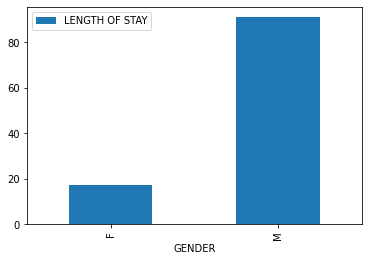

In [57]:
#get the length of stay for all patients (measured in fractional days) and plot their distribution for male and female patients.
df_length_stay = pd.read_sql_query(" SELECT SUM((JULIANDAY(DISCHTIME)-JULIANDAY(ADMITTIME))) AS 'LENGTH OF STAY',PATIENTS.GENDER  FROM ADMISSIONS INNER JOIN PATIENTS ON ADMISSIONS.SUBJECT_ID = PATIENTS.SUBJECT_ID GROUP BY PATIENTS.GENDER  ",con=db)
df_length_stay.plot(x='GENDER',y='LENGTH OF STAY',kind='bar')

In [58]:
#select SUBJECT_ID, ICUSTAY_ID, from icustay and add a column 'LOS_nominal' that converts the LOS into a nominal variable ('Short' if los value > 3 else 'Long')
temp = []
for i in join['LOS']:
    if i > 3:
        i = 'Long'
    else:
        i = 'Short'
    temp.append(i)
join['LOS_nominal'] = temp
join.head(10)

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS,LOS_nominal
0,39793,40036,198489,2141-08-01 23:46:00,2141-08-09 19:15:00,,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Medicare,...,256307,metavision,MICU,MICU,50,50,2171-03-01 17:51:30,2171-03-05 18:28:23,4.0256,Long
1,39793,40036,198489,2141-08-01 23:46:00,2141-08-09 19:15:00,,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Medicare,...,285485,metavision,MSICU,MSICU,52,52,2141-08-01 23:48:48,2141-08-02 18:41:50,0.7868,Short
2,39793,40036,198489,2141-08-01 23:46:00,2141-08-09 19:15:00,,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Medicare,...,252522,metavision,MICU,MICU,23,23,2106-05-31 16:43:46,2106-06-05 13:18:50,4.8577,Long
3,39793,40036,198489,2141-08-01 23:46:00,2141-08-09 19:15:00,,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Medicare,...,264630,metavision,TSICU,TSICU,14,14,2173-01-31 22:11:54,2173-02-05 04:13:20,4.2510,Long
4,39793,40036,198489,2141-08-01 23:46:00,2141-08-09 19:15:00,,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Medicare,...,232646,metavision,MICU,MICU,23,23,2150-02-19 00:14:33,2150-02-25 17:03:04,6.7004,Long
5,39793,40036,198489,2141-08-01 23:46:00,2141-08-09 19:15:00,,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Medicare,...,283260,metavision,CCU,CCU,7,7,2120-01-28 01:35:00,2120-02-07 14:08:02,10.5229,Long
6,39793,40036,198489,2141-08-01 23:46:00,2141-08-09 19:15:00,,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Medicare,...,245649,metavision,CCU,CCU,7,7,2120-02-21 15:23:32,2120-02-24 11:38:17,2.8436,Short
7,39793,40036,198489,2141-08-01 23:46:00,2141-08-09 19:15:00,,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Medicare,...,279554,metavision,MICU,MICU,50,50,2130-02-04 02:27:27,2130-02-06 13:22:34,2.4549,Short
8,39793,40036,198489,2141-08-01 23:46:00,2141-08-09 19:15:00,,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Medicare,...,269173,metavision,CCU,CCU,7,7,2130-08-12 05:50:38,2130-08-15 23:53:00,3.7516,Long
9,39793,40036,198489,2141-08-01 23:46:00,2141-08-09 19:15:00,,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Medicare,...,271730,metavision,CCU,SICU,7,33,2181-10-24 15:58:29,2181-11-06 18:31:18,13.1061,Long


## Analysing patient's laboratory measurements 

Table 'LABEVENTS' contains all laboratory measurements for some specific patients. 'D_LABITEMS' contains definitions for all ITEM_ID associated with lab measurements in the MIMIC database. In this part of the lab session, you should analyse the glucose levels for subject with id 40161. Query the database to retrive only the relevant information; plot the glucose levels for the given subject and interpret the results. 

In [59]:
#query
query_1= (" SELECT * FROM (SELECT * FROM LABEVENTS WHERE SUBJECT_ID = 40161) A INNER JOIN D_LABITEMS B ON A.ITEMID = B.ITEMID AND B.LABEL = 'GLUCOSE' AND B.FLUID= 'BLOOD' ORDER BY A.CHARTTIME ") 

In [60]:
#select only the relevant subset of data
glucose = pd.read_sql(query_1,con=db)
glucose[['CHARTTIME','VALUE','FLAG','CATEGORY']]

,CHARTTIME,VALUE,FLAG,CATEGORY
0,2181-10-24 17:50:00,208,abnormal,CHEMISTRY
1,2181-10-25 04:37:00,166,abnormal,CHEMISTRY
2,2181-10-25 17:51:00,185,abnormal,CHEMISTRY
3,2181-10-26 04:50:00,93,,CHEMISTRY
4,2181-10-26 04:55:00,92,,BLOOD GAS
...,...,...,...,...
87,2181-11-24 13:40:00,219,abnormal,CHEMISTRY
88,2181-11-25 04:02:00,189,abnormal,CHEMISTRY
89,2181-11-25 14:38:00,153,abnormal,CHEMISTRY
90,2181-11-25 14:58:00,136,abnormal,BLOOD GAS


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='CHARTTIME'>

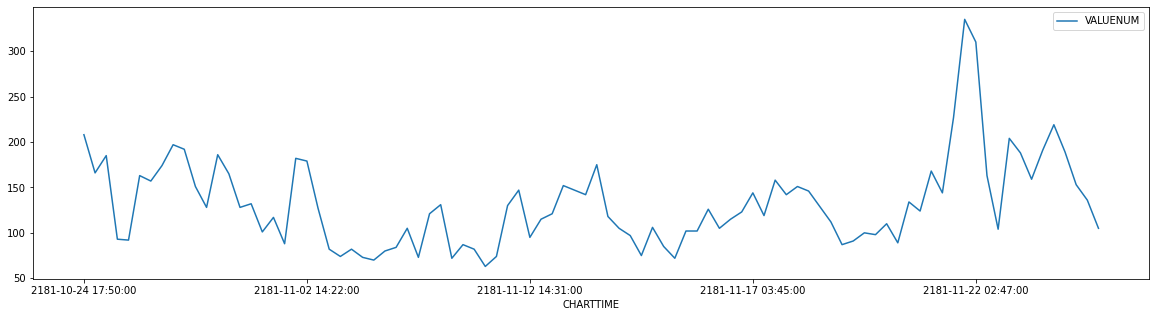

In [61]:
#plot
glucose[['CHARTTIME','VALUENUM']].plot(x='CHARTTIME',y='VALUENUM',kind='line',figsize=(20,5))

## interpret result
### High glucose levels have a Flag raised abnormal , which means they are diabetic

## Analysing patient's vital signs

During an intensive care unit (ICU) stay, the primary repository of a patient’s information is their electronic chart which displays patients’ routine vital signs,laboratory values, mental status, etc. 'CHARTEVENTS' table contains all the charted data available for a patient. 'ICUSTAYS' table (derived from the 'TRANSFERS' table) provides information about the date and time when the patient was transferred into/out the ICU. 'D_ITEMS' provides information about all items in the ICU databases. Considering the information you get from these three tables, find out how does the oxygen saturation level for patient with icu_stay_id 256307 change over time and interpret the results.

In [62]:
#query
query_2 = """ SELECT * FROM (SELECT * FROM CHARTEVENTS WHERE ICUSTAY_ID = 256307) A 
INNER JOIN (SELECT * FROM ICUSTAYS WHERE ICUSTAY_id = 256307) B 
ON A.ICUSTAY_ID = B.ICUSTAY_ID AND A.CHARTTIME 
BETWEEN B.INTIME AND B.OUTTIME 
INNER JOIN (SELECT ITEMID FROM D_ITEMS WHERE LABEL ='O2 saturation pulseoxymetry') C 
ON A.ITEMID = C.ITEMID ORDER BY CHARTTIME """

In [63]:
#slect ony the relevant subset of data
v_sign = pd.read_sql(query_2,con=db)
v_sign[['CHARTTIME','VALUENUM']]

,CHARTTIME,VALUENUM
0,2171-03-01 19:14:00,100.0
1,2171-03-01 20:00:00,100.0
2,2171-03-01 21:00:00,100.0
3,2171-03-01 22:00:00,100.0
4,2171-03-01 23:00:00,99.0
...,...,...
89,2171-03-05 12:00:00,97.0
90,2171-03-05 13:00:00,98.0
91,2171-03-05 14:27:00,98.0
92,2171-03-05 15:00:00,100.0


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='CHARTTIME'>

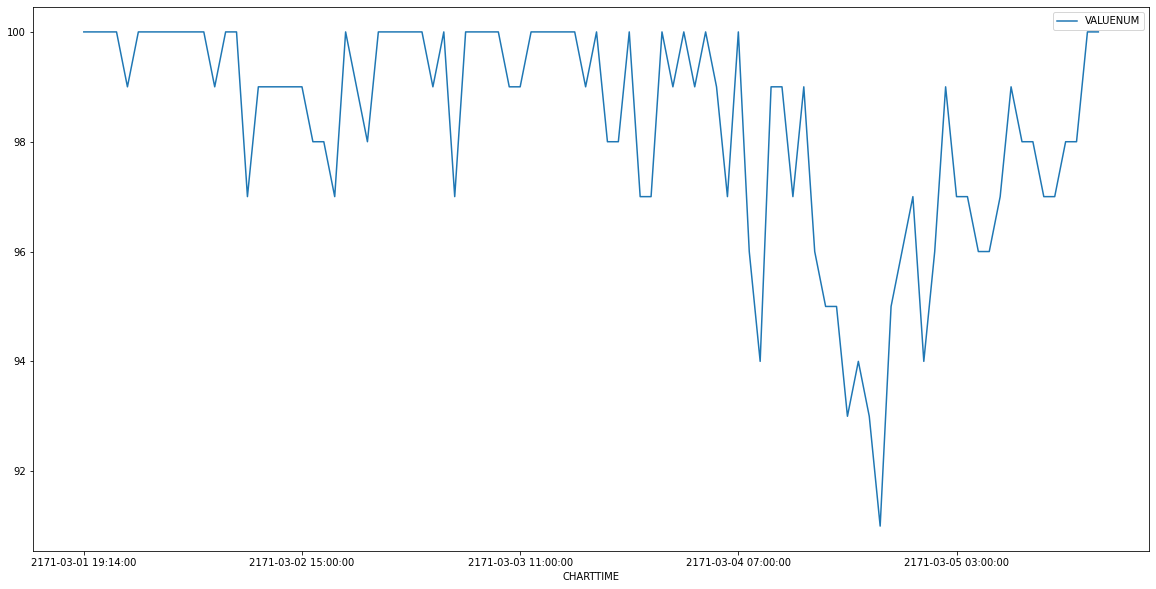

In [64]:
#plot
v_sign[['CHARTTIME','VALUENUM']].plot(x='CHARTTIME',y='VALUENUM',kind='line',figsize=(20, 10))


## interpret result (written comments)

###  The normal oxygen saturation range is above 95%. .The case here is , the patient seems to have a consistent range above 95% up until around at 7:00 am on 04/03, when this number drops to  92% and then recovers back to normalcy again .